***WALMART SALES***

**Part 1: make an EDA and all the necessary preprocessings to prepare data for machine learning**

Exploring the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline


In [2]:
dataset = pd.read_csv('/Users/lamothemarjory/Downloads/Projet ML Sup 01 (Walmart)/Walmart_Store_sales.csv')

In [3]:
print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Number of rows : 150

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

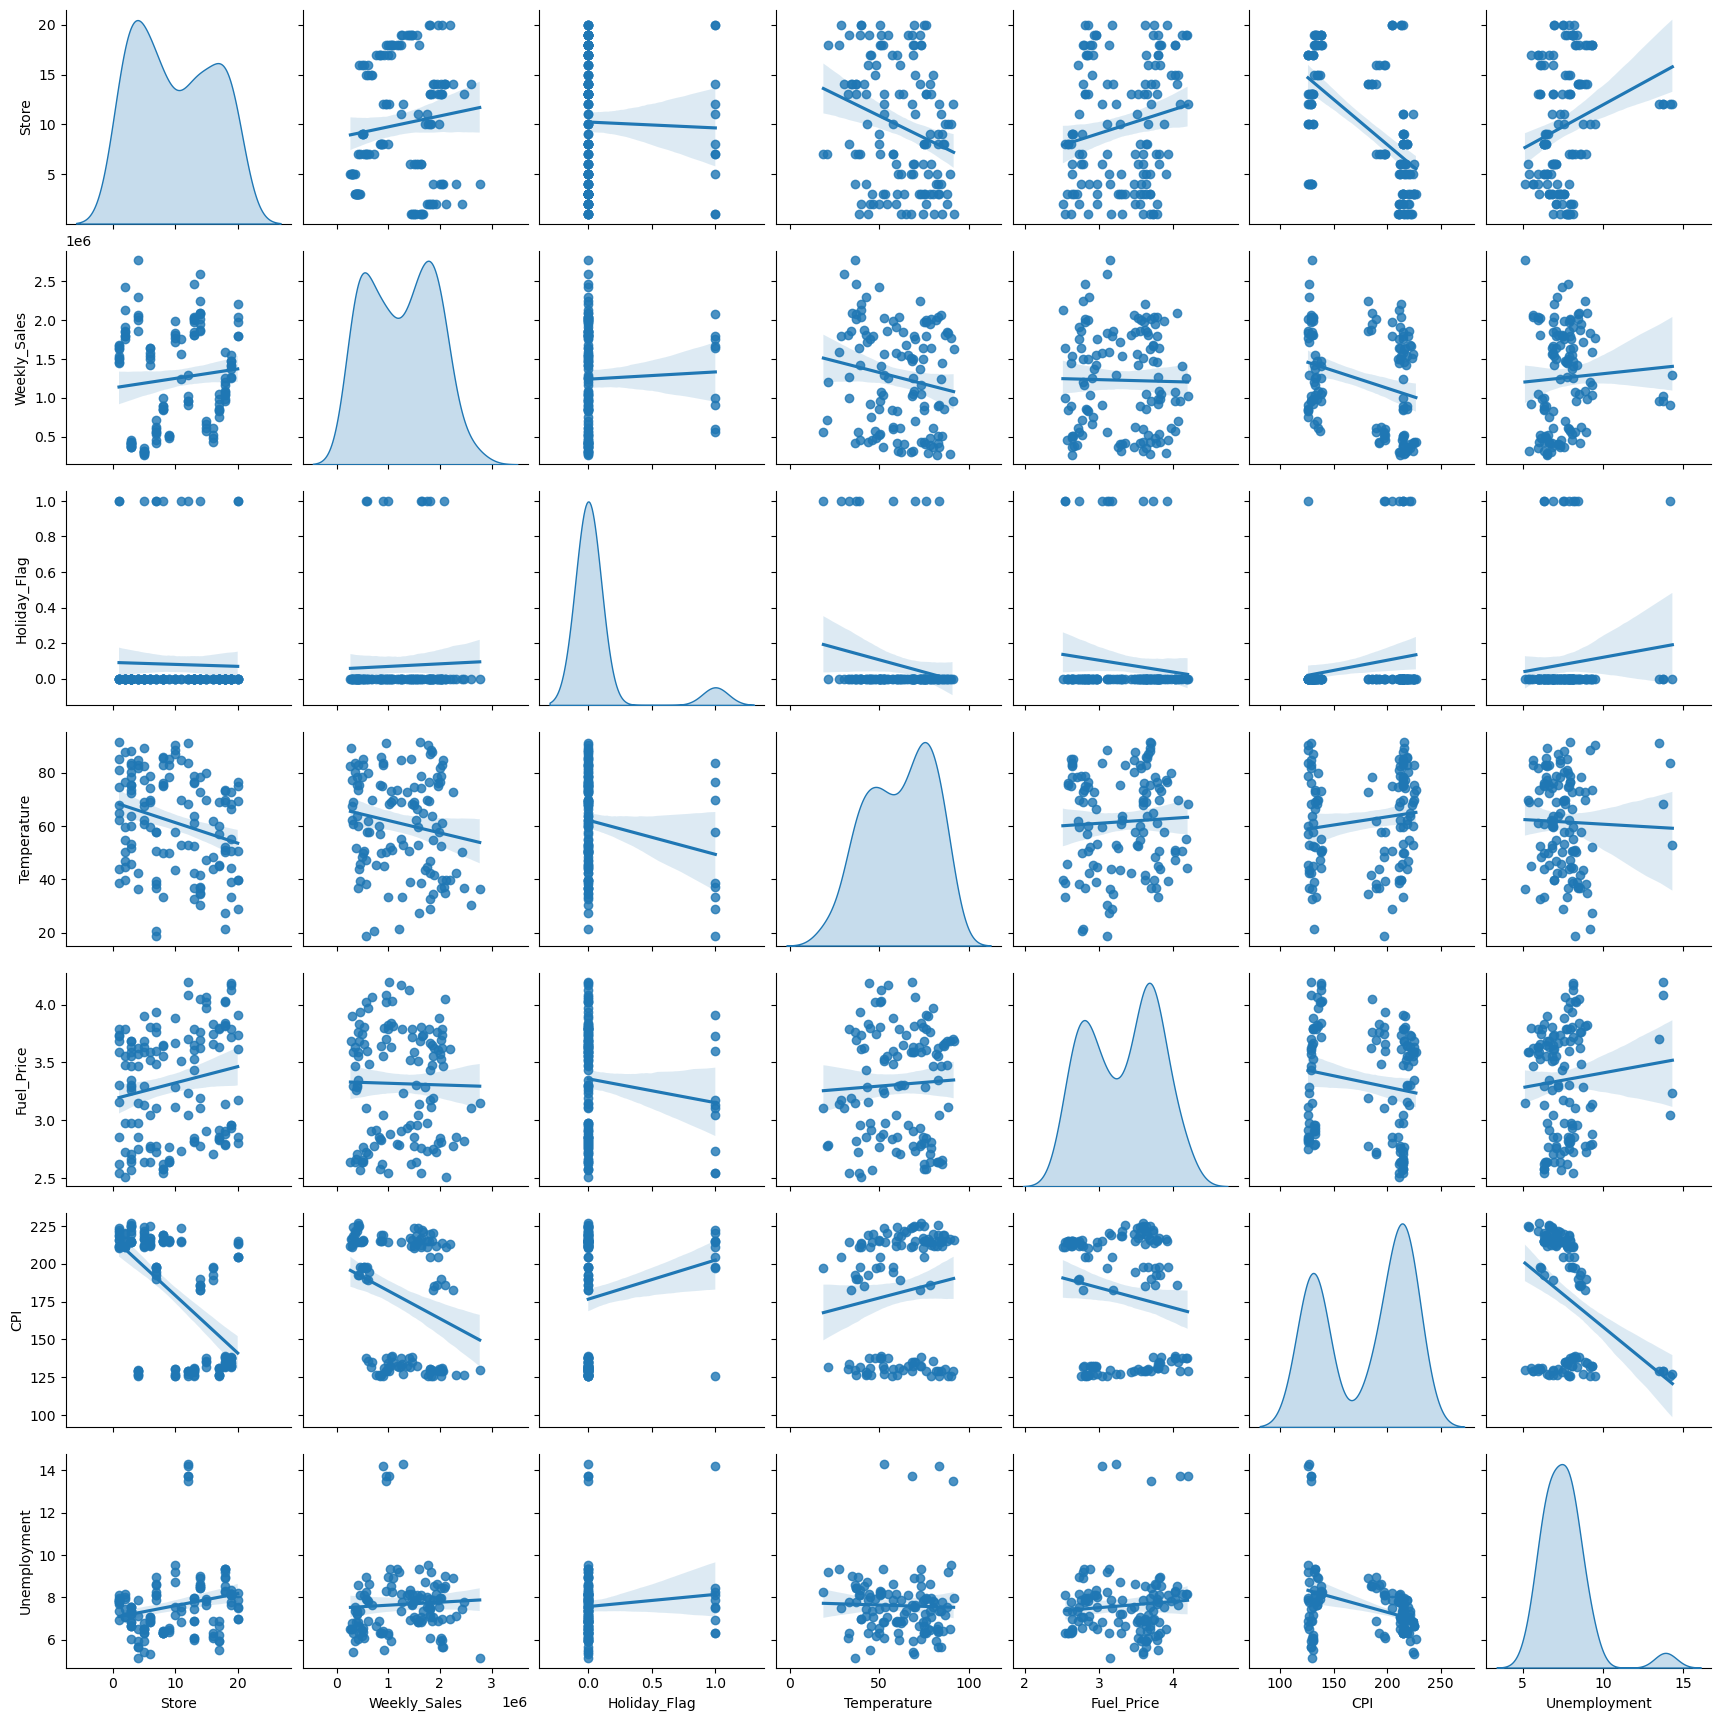

In [4]:
fig=  sns.pairplot(dataset, kind="reg", diag_kind="kde")

In [5]:
corr_matrix = dataset.corr().round(2)

import plotly.figure_factory as ff

fig2 = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.tolist(),
                                  y = corr_matrix.index.tolist())


fig2.show()

/var/folders/xb/drv26b894gdfny25v9m1mw040000gn/T/ipykernel_86149/2330101620.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr().round(2)


Preprocessing

Droping lines where target values are missing

In [6]:
dataset=dataset.dropna(subset=['Weekly_Sales'])

Creating usable features from the Date column

In [7]:
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%j-%m-%Y')
dataset=dataset.dropna(subset=['Date'])

In [8]:
dataset['Year'] = dataset['Date'].dt.strftime("%Y").astype(int)
dataset['Month'] = dataset['Date'].dt.strftime("%m").astype(int)
dataset['Day'] = dataset['Date'].dt.strftime("%j").astype(int)
dataset['DayOfWeek'] = dataset['Date'].dt.strftime("%w").astype(int)
dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,DayOfWeek
0,6.0,2011-01-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011,1,18,2
1,13.0,2011-01-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,1,25,2
4,6.0,2010-01-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,1,28,4
5,4.0,2010-01-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,1,28,4
6,15.0,2011-01-03,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
144,3.0,2012-01-19,424513.08,0.0,73.44,3.594,226.968844,6.034,2012,1,19,4
145,14.0,2010-01-18,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010,1,18,1
147,17.0,2010-01-11,845252.21,0.0,57.14,2.841,126.111903,NaN,2010,1,11,1
148,8.0,2011-01-12,856796.10,0.0,86.05,3.638,219.007525,NaN,2011,1,12,3


Droping lines containing invalid values or outliers

In [9]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
    return df

In [10]:
remove_outliers(dataset,['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], 3)

Working on column: Temperature
Working on column: Fuel_Price
Working on column: CPI
Working on column: Unemployment


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,DayOfWeek
0,6.0,2011-01-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011,1,18,2
1,13.0,2011-01-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,1,25,2
4,6.0,2010-01-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,1,28,4
6,15.0,2011-01-03,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,1,3,1
7,20.0,2012-01-03,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
139,7.0,2012-01-25,532739.77,0.0,50.60,3.804,197.588605,8.090,2012,1,25,3
143,3.0,2010-01-04,396968.80,0.0,78.53,2.705,214.495838,7.343,2010,1,4,1
144,3.0,2012-01-19,424513.08,0.0,73.44,3.594,226.968844,6.034,2012,1,19,4
145,14.0,2010-01-18,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010,1,18,1


Separating target to predict

In [11]:
print("Separating labels from features...")
features_list = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'DayOfWeek']
target_variable = "Weekly_Sales"

X = dataset.loc[:,features_list]
Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    1572117.54
1    1807545.43
4    1644470.66
5    1857533.70
6     695396.19
Name: Weekly_Sales, dtype: float64

X :
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0    6.0           NaN        59.61       3.045  214.777523         6.858   
1   13.0           0.0        42.38       3.435  128.616064         7.470   
4    6.0           0.0        78.89       2.759  212.412888         7.092   
5    4.0           0.0          NaN       2.756  126.160226         7.896   
6   15.0           0.0        69.80       4.069  134.855161         7.658   

   Year  Month  Day  DayOfWeek  
0  2011      1   18          2  
1  2011      1   25          2  
4  2010      1   28          4  
5  2010      1   28          4  
6  2011      1    3          1  


Explanatory variables preprocessing (scikit-learn) --> 

We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.

* Categorical variables : Store, Holiday_Flag
* Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

In [12]:
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [13]:
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'DayOfWeek']
categorical_features = ['Store', 'Holiday_Flag']
print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'DayOfWeek']
Found categorical features  ['Store', 'Holiday_Flag']


**Part 2: Baseline model**

Training

In [14]:

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()), 
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) 
print()

print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !! 
print('...Done.')
print(X_test[0:5,:])

print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Performing preprocessings on train set...
     Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
139    7.0           0.0        50.60       3.804  197.588605         8.090   
16    13.0           0.0        76.34       2.850         NaN         7.951   
75    20.0           0.0        75.17       2.808  204.567546         7.856   
93    12.0           0.0          NaN       4.087  129.062355        13.736   
32     7.0           1.0        18.79       3.103  196.919506         8.256   

     Year  Month  Day  DayOfWeek  
139  2012      1   25          3  
16   2010      1   20          3  
75   2010      1   25          1  
93   2011      1   27          4  
32   2012      1   10          2  
...Done.
[[-6.36674781e-01  1.17447610e+00  5.78554151e-01  2.12597968e-01
   1.43193029e+00  0.00000000e+00  1.08058167e+00  1.24414138e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00


Assessement of the performances

In [15]:
print("R2 score on training set : ", regressor.score(X_train, Y_train))
print("R2 score on test set : ", regressor.score(X_test, Y_test))

R2 score on training set :  0.9739737656198386
R2 score on test set :  0.9279915049195142


Analyze the values of the model's coefficients to know what features are important for the prediction. 

To do so, the .coef_ attribute of scikit-learn's LinearRegression class might be useful. 

Please refer to the following link for more information https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

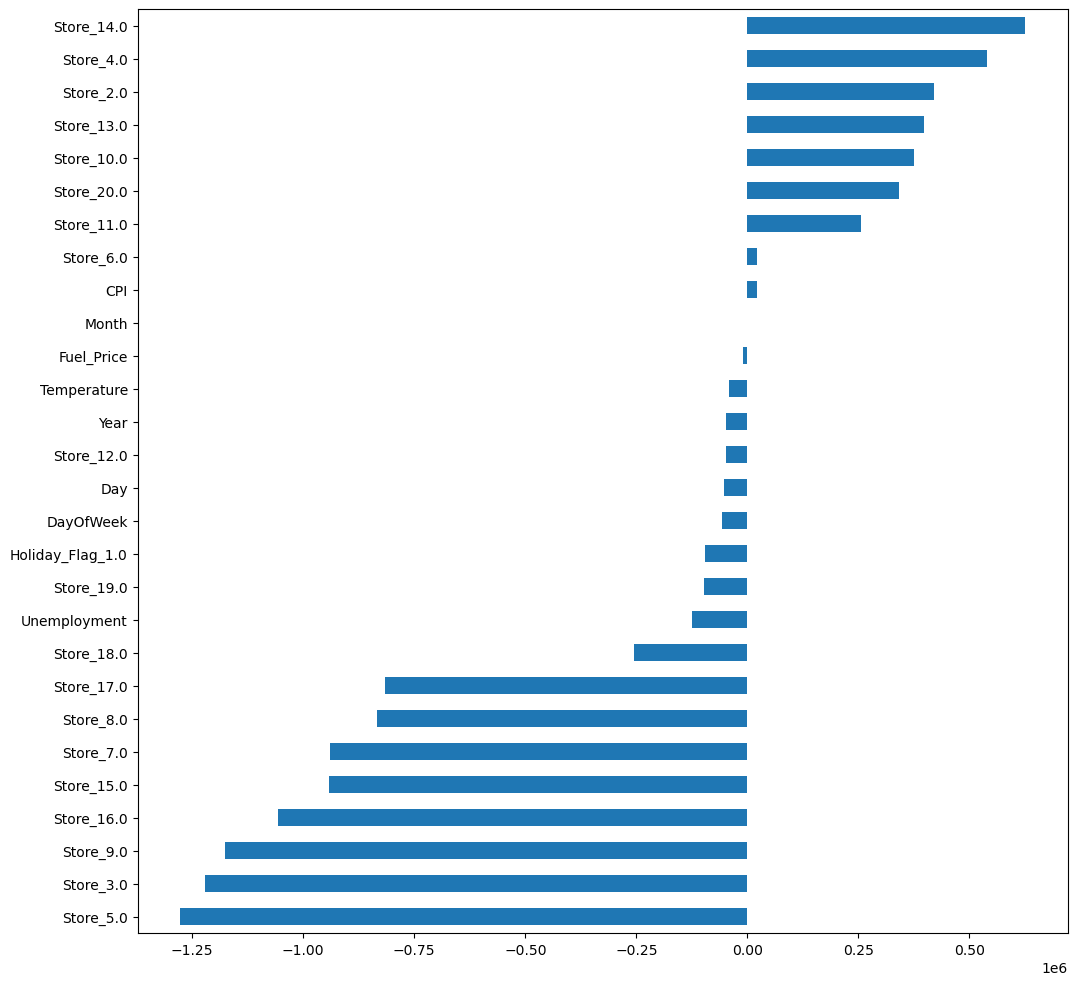

In [16]:
col_names = list(preprocessor.transformers_[0][1].get_feature_names_out()) + list(preprocessor.transformers_[1][1].get_feature_names_out())
feat_importances = pd.Series(regressor.coef_, index=col_names)
plt.figure(figsize=(12,12))
feat_importances.sort_values().plot(kind='barh')
plt.show()

Fight overfitting

In this last part, you'll have to train a regularized linear regression model

In [17]:
lasso1 = Lasso(alpha = 0.1)
print(lasso1)
lasso1.fit(X_train, Y_train)
# Print R^2 scores
print("R2 score on training set : ", lasso1.score(X_train, Y_train))
print("R2 score on test set : ", lasso1.score(X_test, Y_test))

Lasso(alpha=0.1)
R2 score on training set :  0.9739737655990889
R2 score on test set :  0.9279919201892216


**Bonus question**

In regularized regression models, there's a hyperparameter called the regularization strength that can be fine-tuned to get the best generalized predictions on a given dataset. 

This fine-tuning can be done thanks to scikit-learn's GridSearchCV class: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Also, you'll find here some examples of how to use GridSearchCV together with Ridge or Lasso models : https://alfurka.github.io/2018-11-18-grid-search/

In [18]:
# Perform grid search
print("Grid search...")
regressor = Lasso()
# Grid of values to be tested
params = {
    'alpha': np.arange(0.00001, 0.00005, 0.0001)
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 10, verbose = 1) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
Fitting 10 folds for each of 1 candidates, totalling 10 fits
...Done.
Best hyperparameters :  {'alpha': 1e-05}
Best R2 score :  0.9394022142798081
